<a href="https://colab.research.google.com/github/FucsikovaTereza/Research_Project/blob/main/bad_postures_3Dplots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
!git clone https://github.com/FucsikovaTereza/Research_Project
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Cloning into 'Research_Project'...
remote: Enumerating objects: 102, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 102 (delta 5), reused 3 (delta 1), pack-reused 75
Receiving objects: 100% (102/102), 253.38 MiB | 24.80 MiB/s, done.
Resolving deltas: 100% (32/32), done.


In [22]:
def plot_landmarks_from_csv(file_path: str, row_index: int, posture_label: str, orientation = 'front'):
    df = pd.read_csv(file_path)
    if row_index < 0 or row_index >= len(df):
        raise ValueError("row_index is out of bounds")

    plt.figure(figsize=(10, 10))
    ax = plt.axes(projection='3d')
    ax.view_init(elev=10, azim=10)

    valid_columns = [col for col in df.columns if 'world' in col]

    color = 'red'
    line_thickness = 5

    points_to_connect = []

    for i in range(0, len(valid_columns), 3):
        try:
            x = df.loc[row_index, valid_columns[i]]
            y = df.loc[row_index, valid_columns[i+1]]
            z = df.loc[row_index, valid_columns[i+2]]
            # Skip points where all coordinates are 0
            if x == 0 and y == 0 and z == 0:
                points_to_connect.append(None)
            else:
                ax.scatter3D(
                    xs=[-z],
                    ys=[x],
                    zs=[-y],
                    color=color,
                    linewidth=line_thickness)
                points_to_connect.append((-z, x, -y))
        except IndexError:
            break
    if orientation == 'front':
      connections = [(1, 2), (0, 3), (0, 4), (3, 5), (4, 6), (7, 8)]
    else:
      connections = [(0, 5), (0, 6), (1, 2), (3, 4), (1, 3), (2, 4), (5, 7), (6, 8), (3, 13), (4, 14), (13, 15), (14, 16), (1, 9), (2, 10), (9, 11), (10, 12), (17, 18)]

    for i, (start_idx, end_idx) in enumerate(connections):
        # Check if both start and end points are visible before drawing the connection
        if start_idx < len(points_to_connect) and end_idx < len(points_to_connect) and points_to_connect[start_idx] is not None and points_to_connect[end_idx] is not None:
            ax.plot3D(
                [points_to_connect[start_idx][0], points_to_connect[end_idx][0]],
                [points_to_connect[start_idx][1], points_to_connect[end_idx][1]],
                [points_to_connect[start_idx][2], points_to_connect[end_idx][2]],
                color="black", linewidth=line_thickness)

    plt.title(f'3D Scatter Plot of Landmarks: {posture_label}')
    plt.show()

In [23]:
# Labels for the postures
posture_labels = [
    "Sitting upright",
    "Crossing legs (right leg over left)",
    "Crossing legs (left leg over right)",
    "Leaning on the left hand",
    "Leaning on the right hand",
    "Slouching down in the chair",
    "Extending the head forward",
    "Slouching",
    "Writing on paper",
    "Sitting at the edge of the chair with legs stretched out",
    "Sitting on left leg",
    "Sitting on right leg"
]

# Rows corresponding to different postures
rows = [899, 2699, 6299, 9899, 13499, 17099, 20699, 24299, 27899, 31499, 35099, 38699]

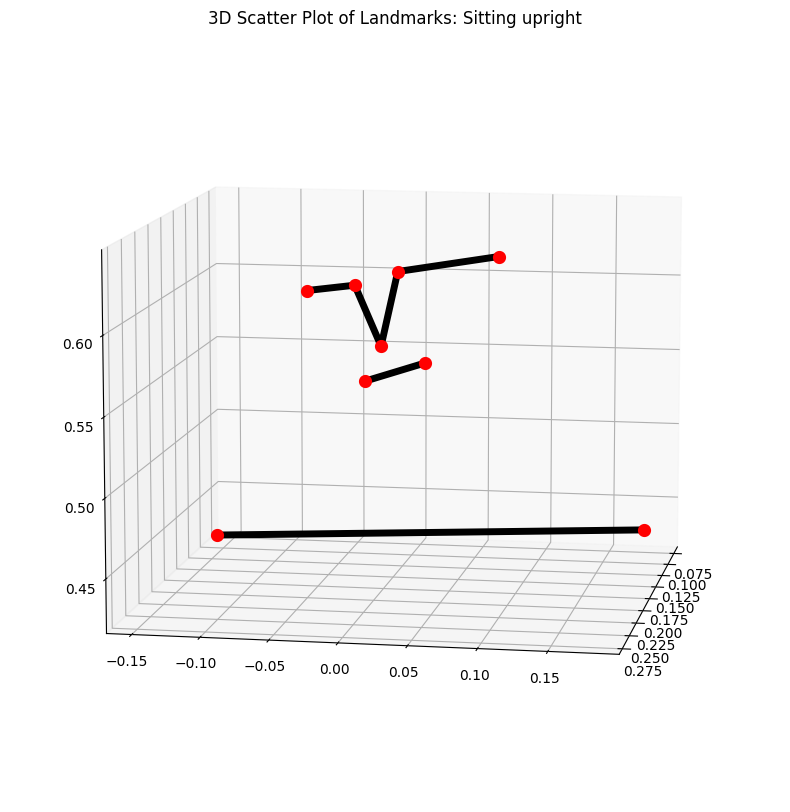

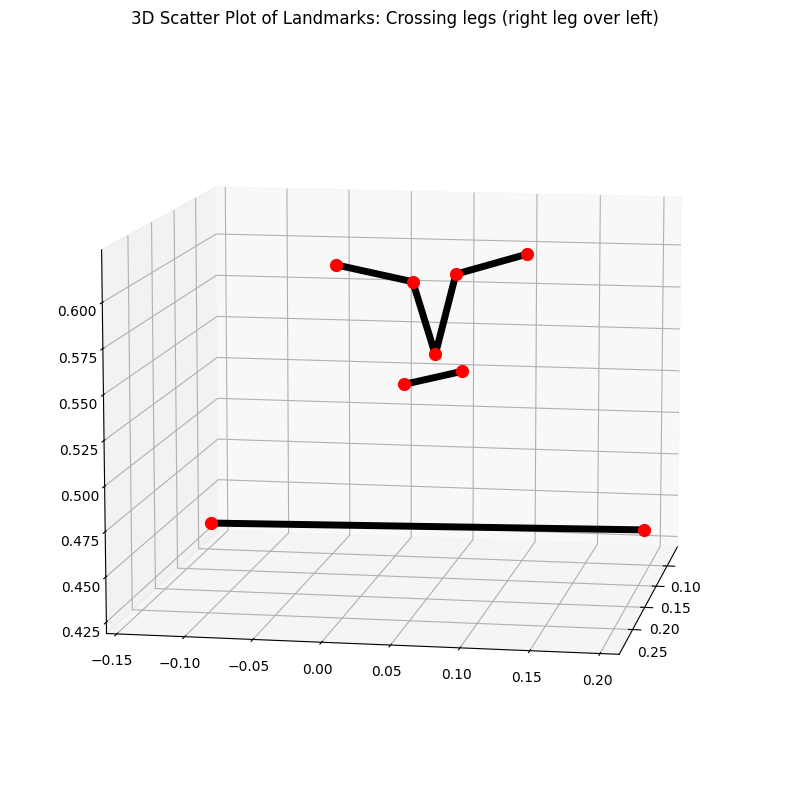

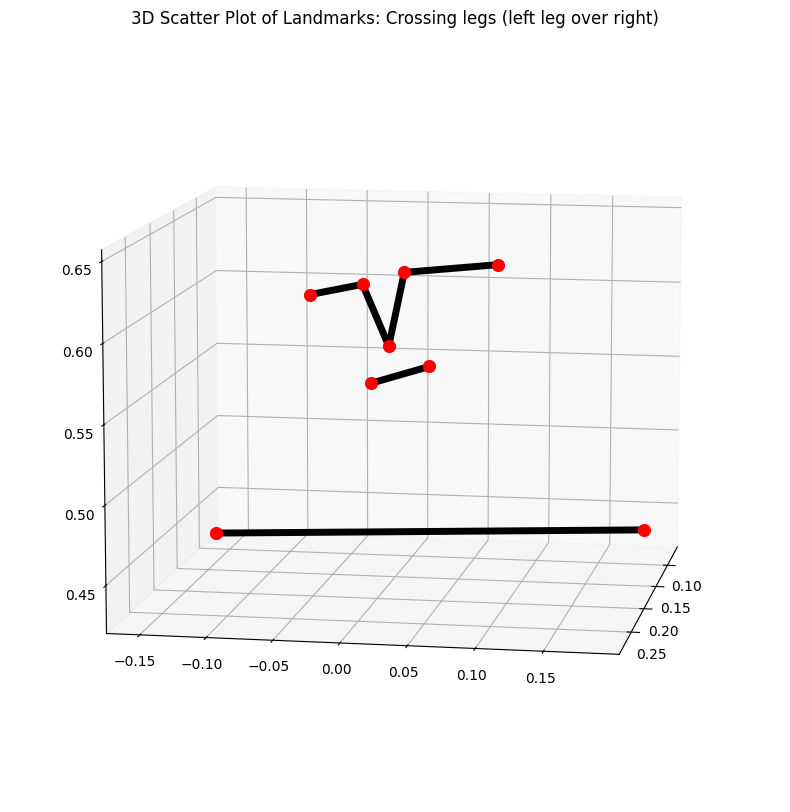

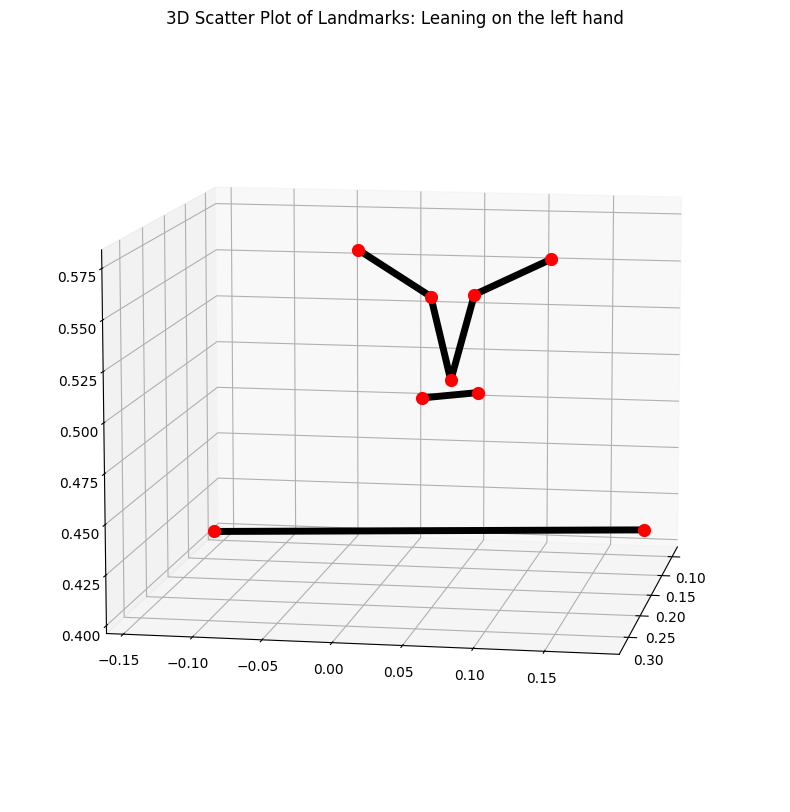

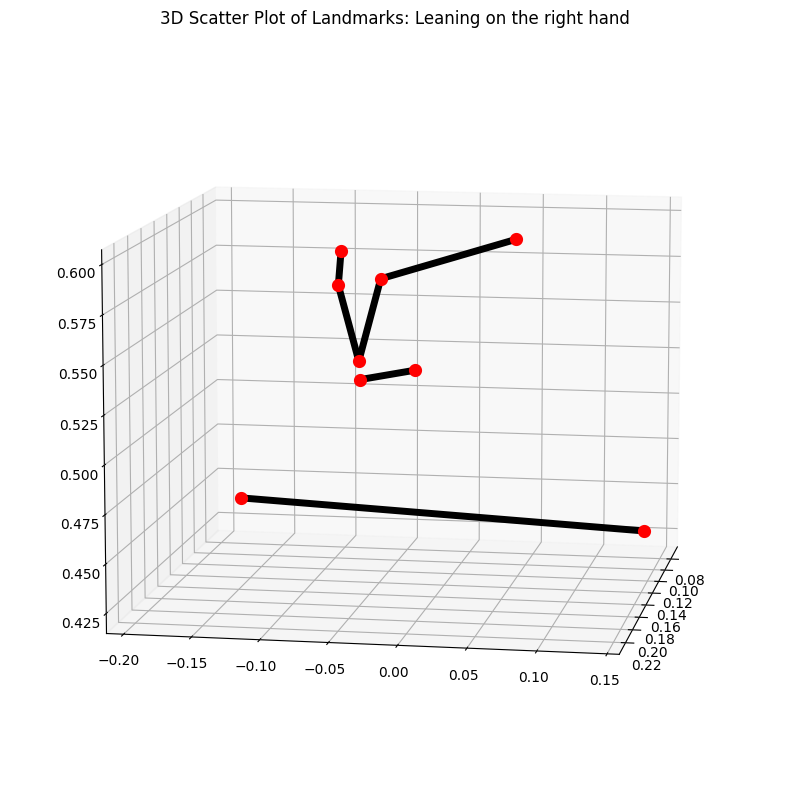

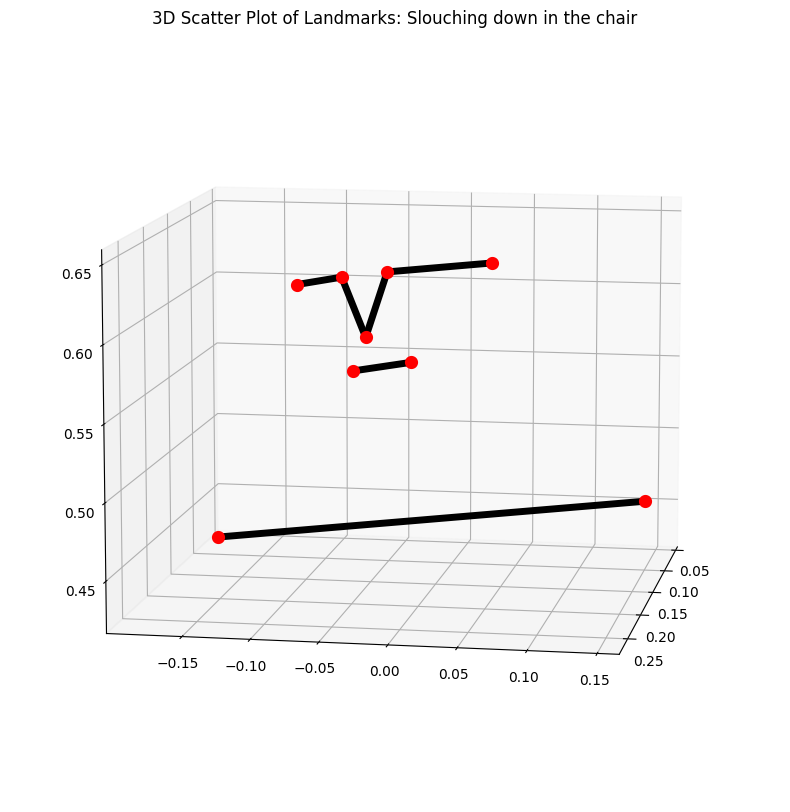

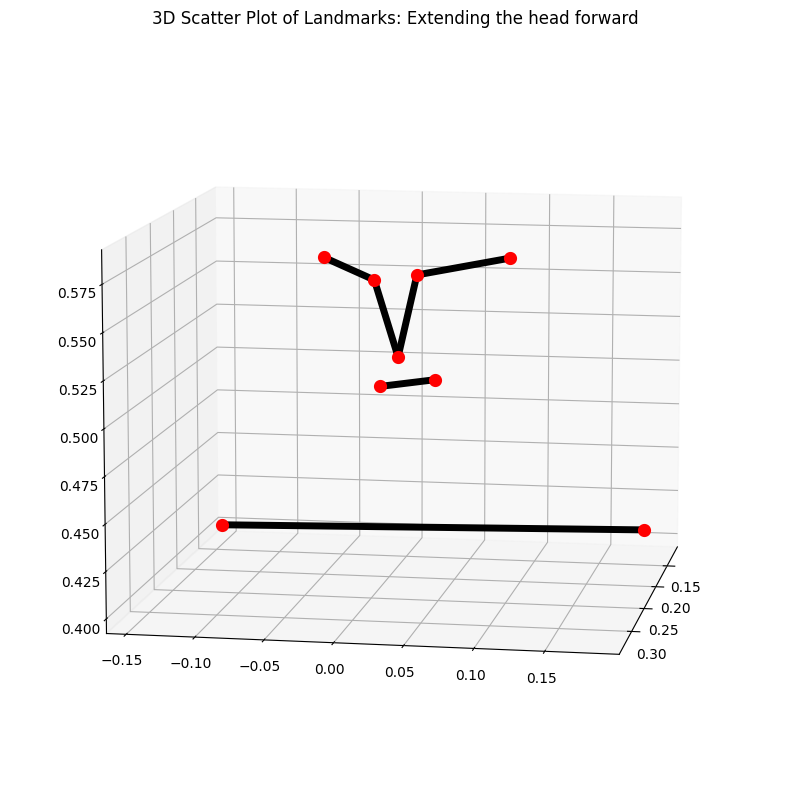

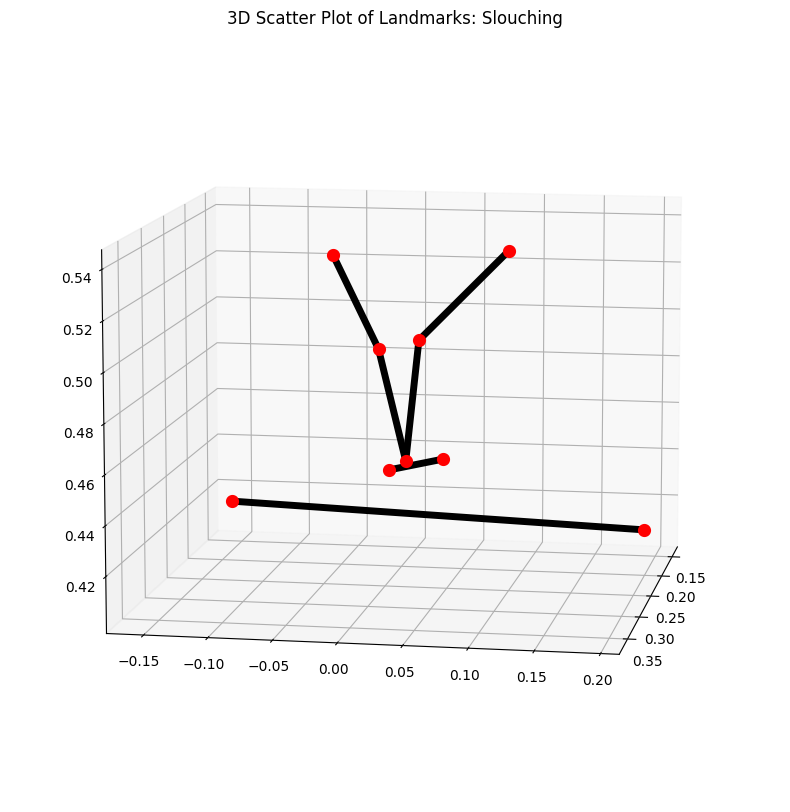

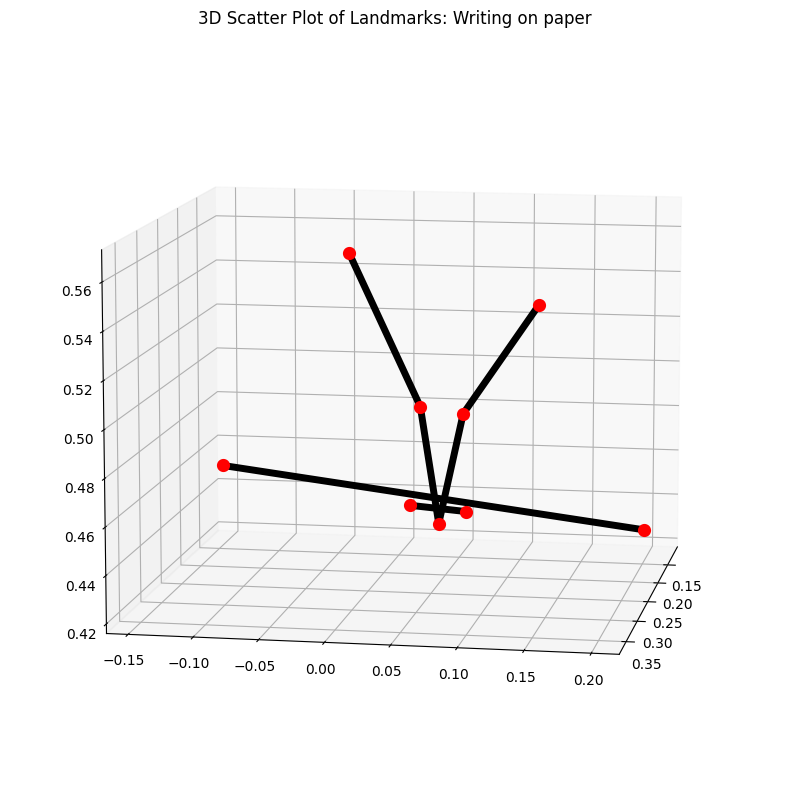

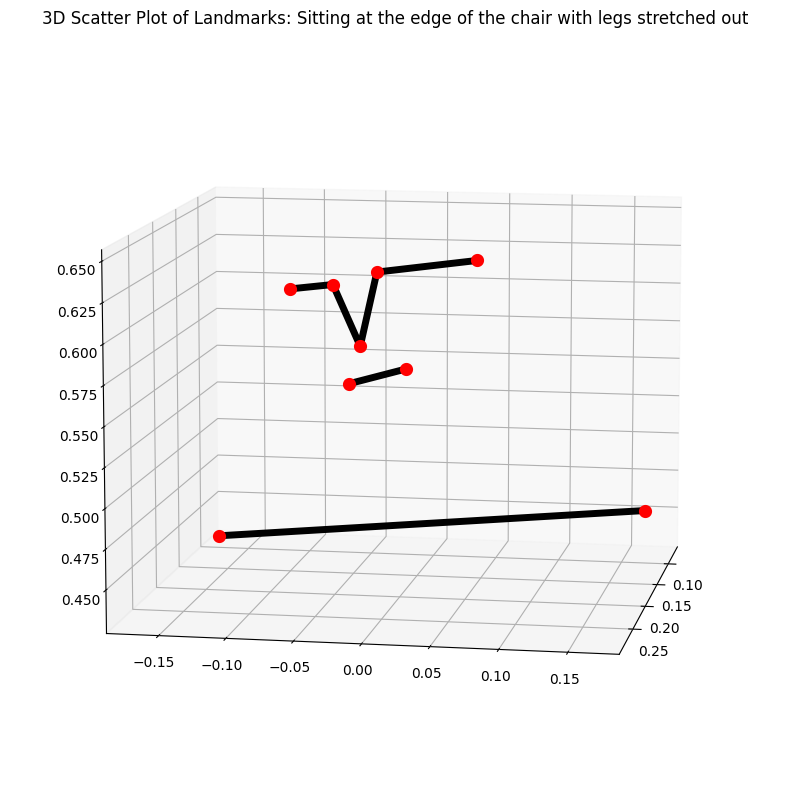

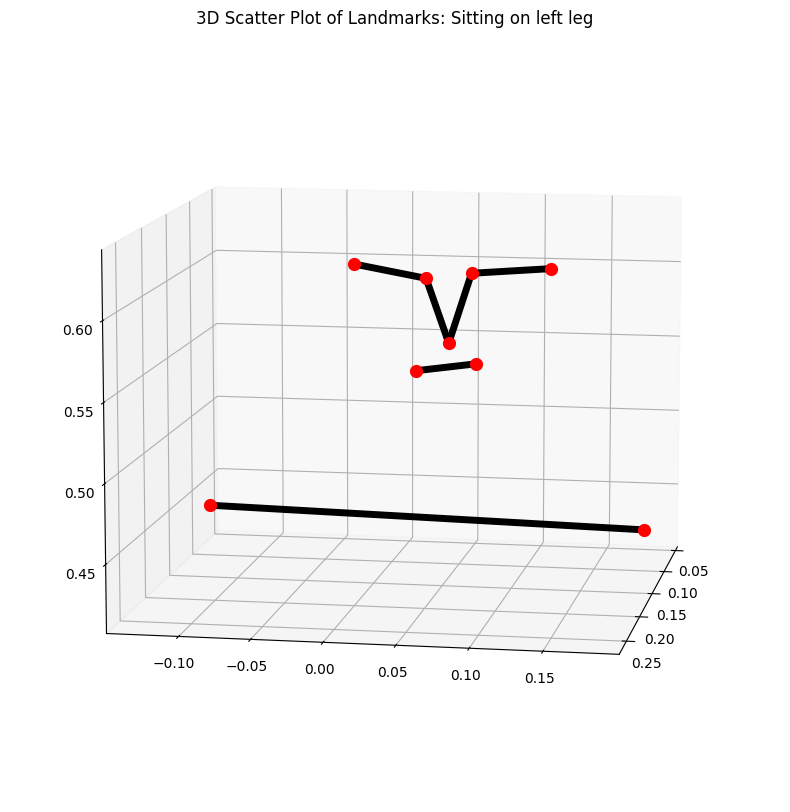

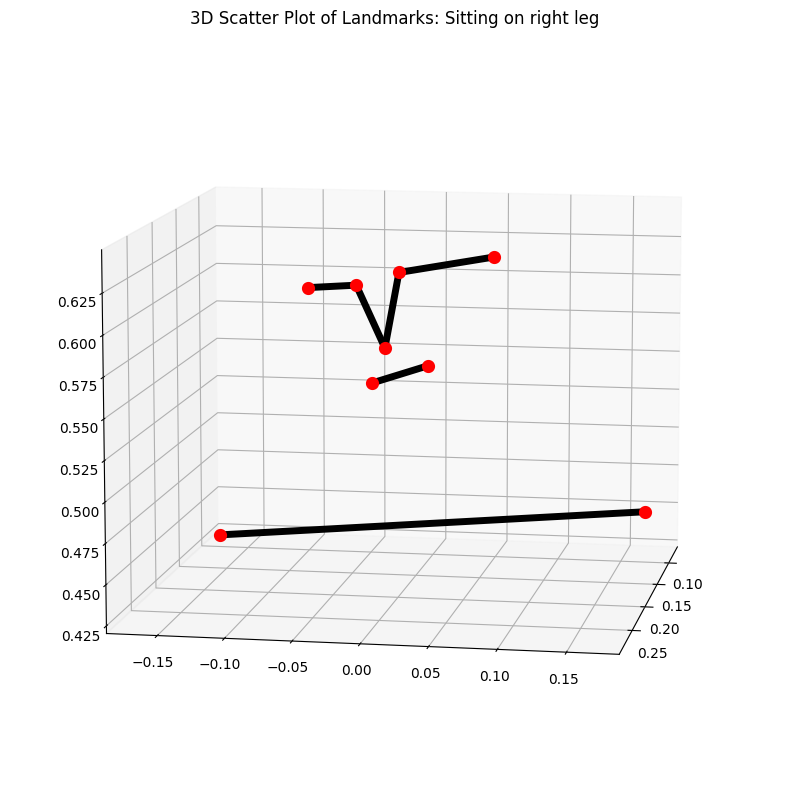

In [24]:
file_path = 'Research_Project/bad_postures_csv/2024-04-01 16-25-44-1.csv'

# Loop through each row and plot
for i, row in enumerate(rows[:len(posture_labels)]):
    plot_landmarks_from_csv(file_path, row, posture_labels[i], 'front')

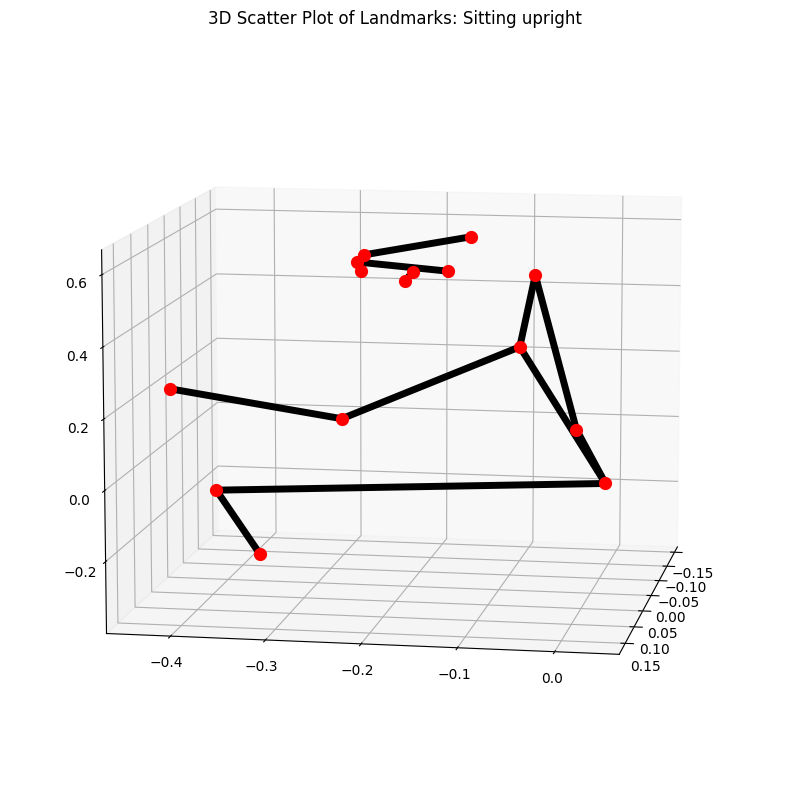

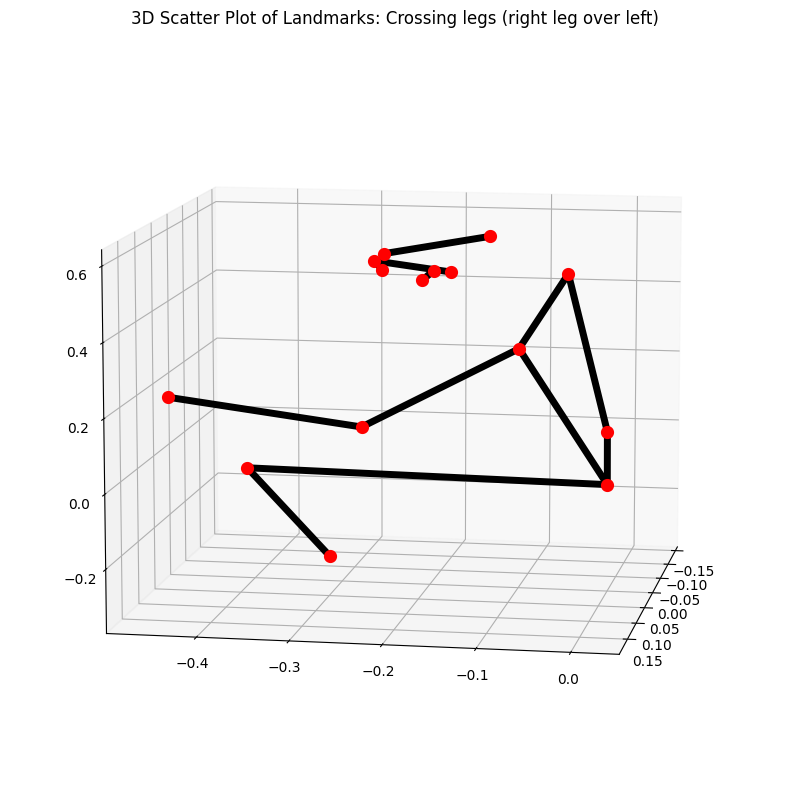

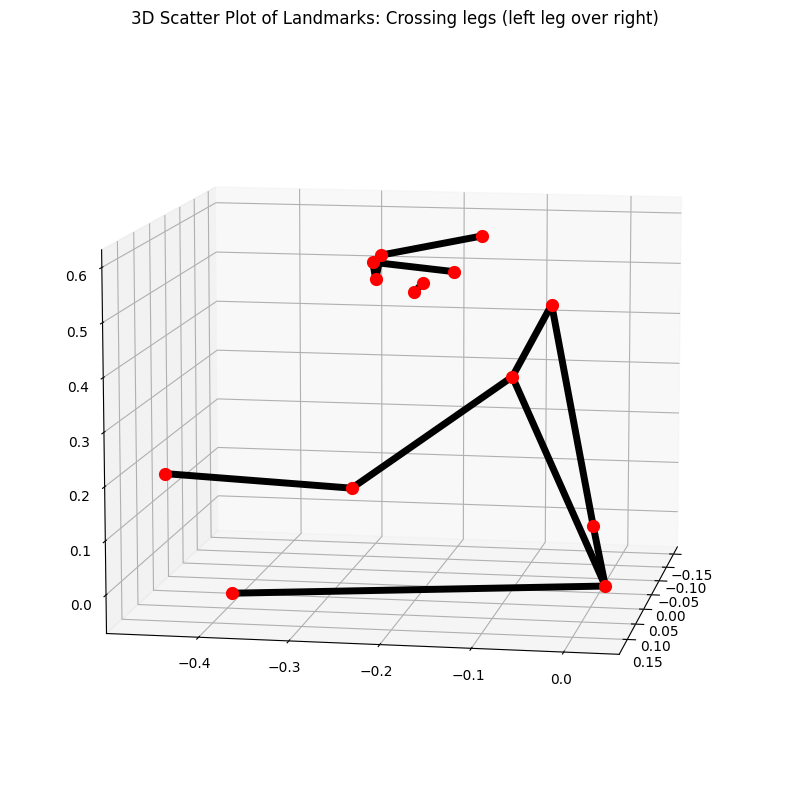

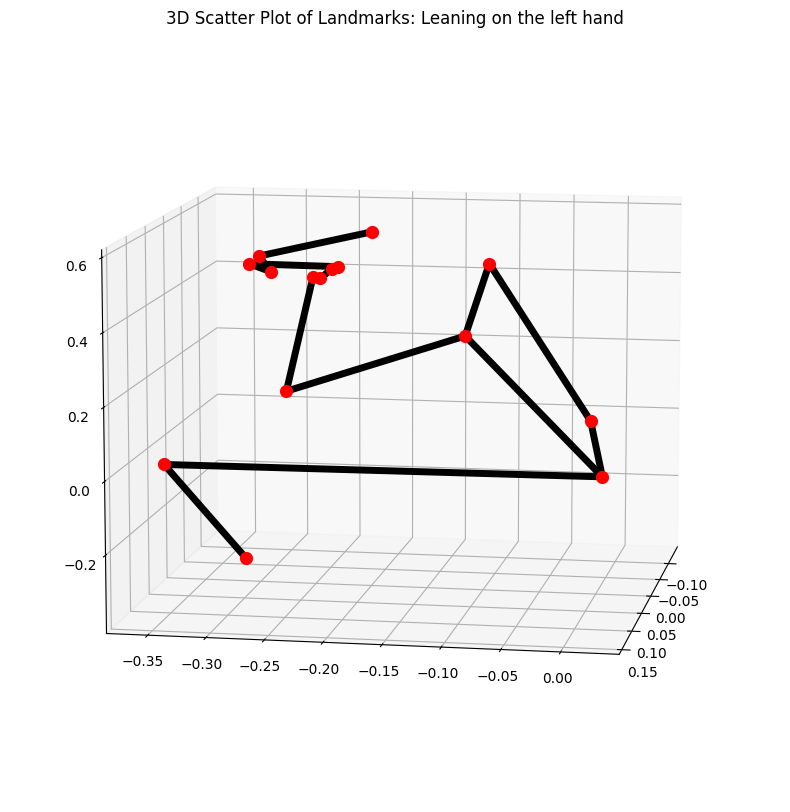

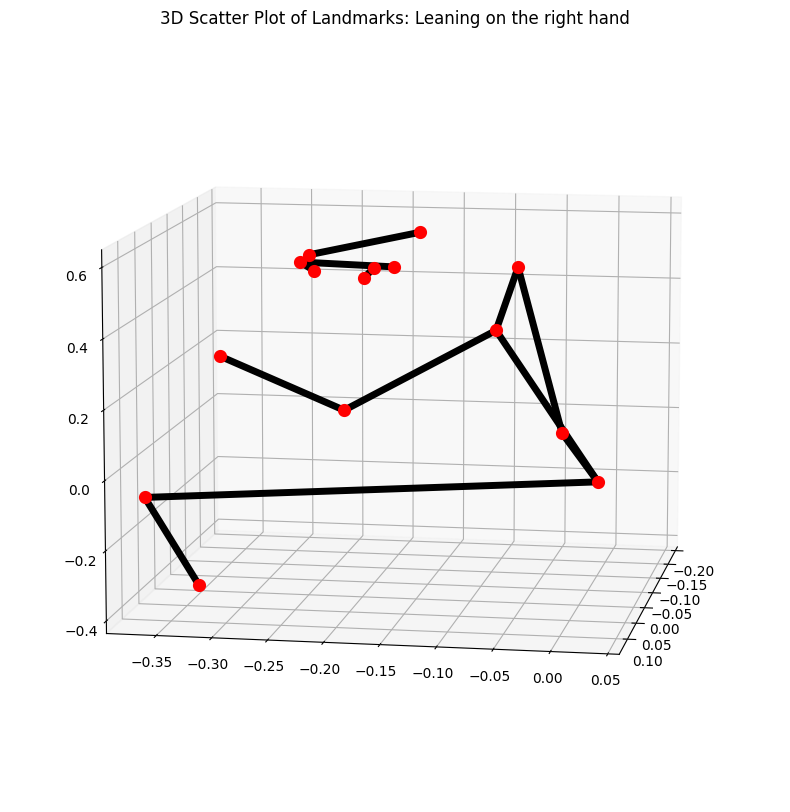

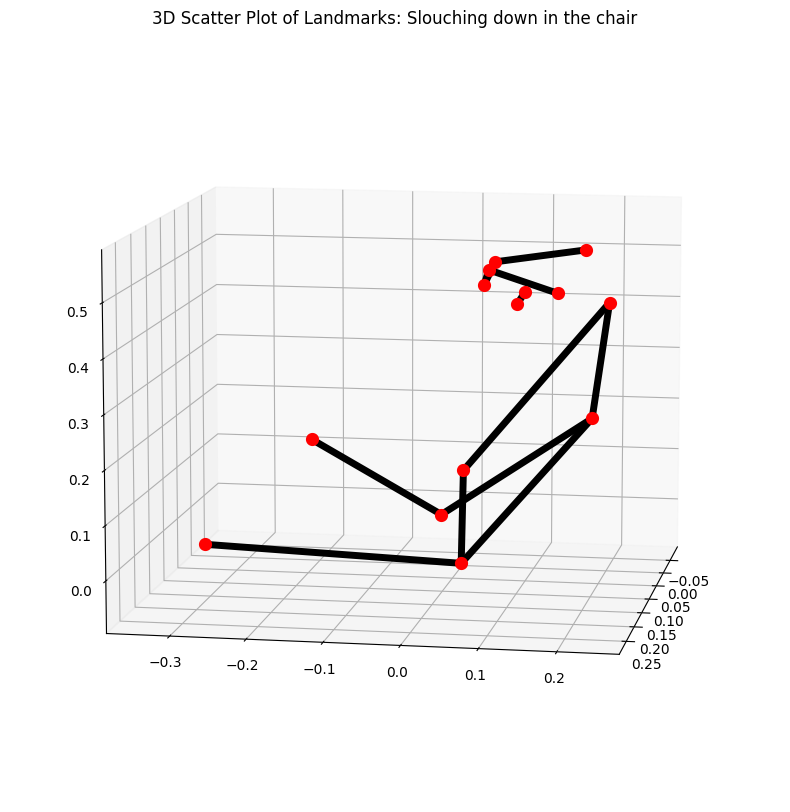

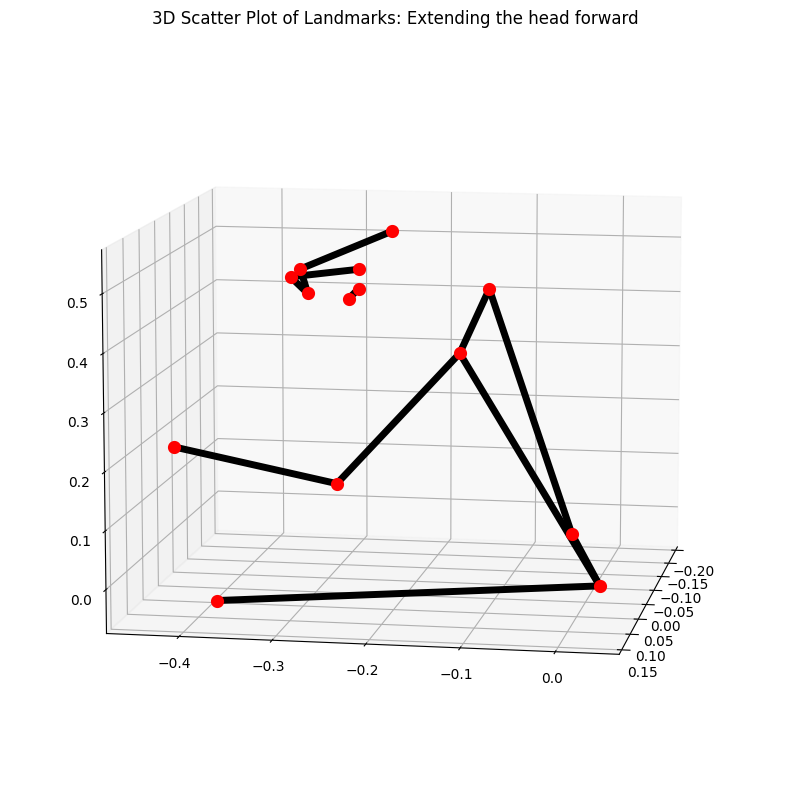

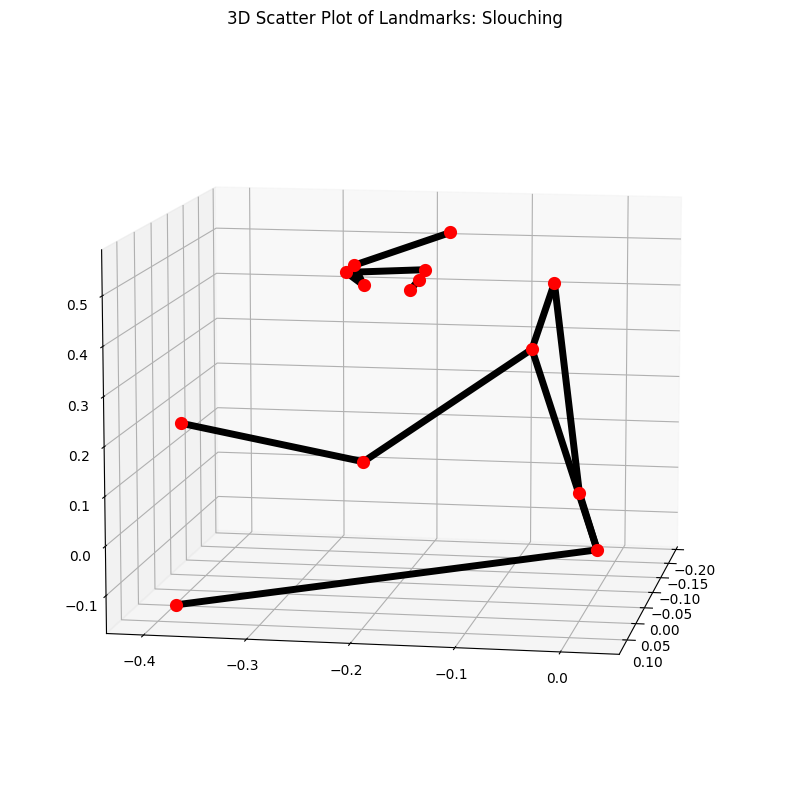

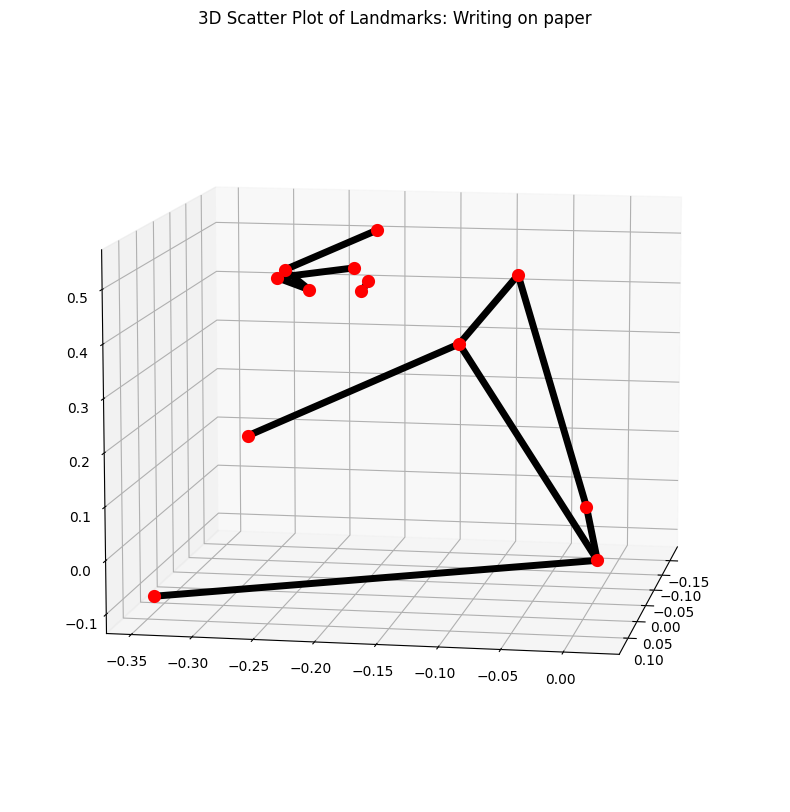

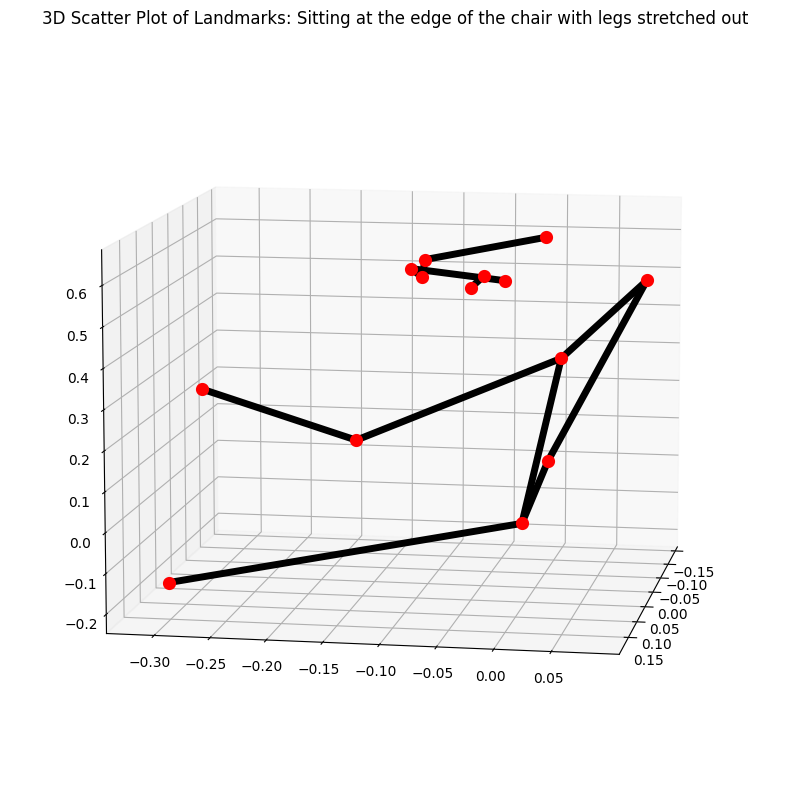

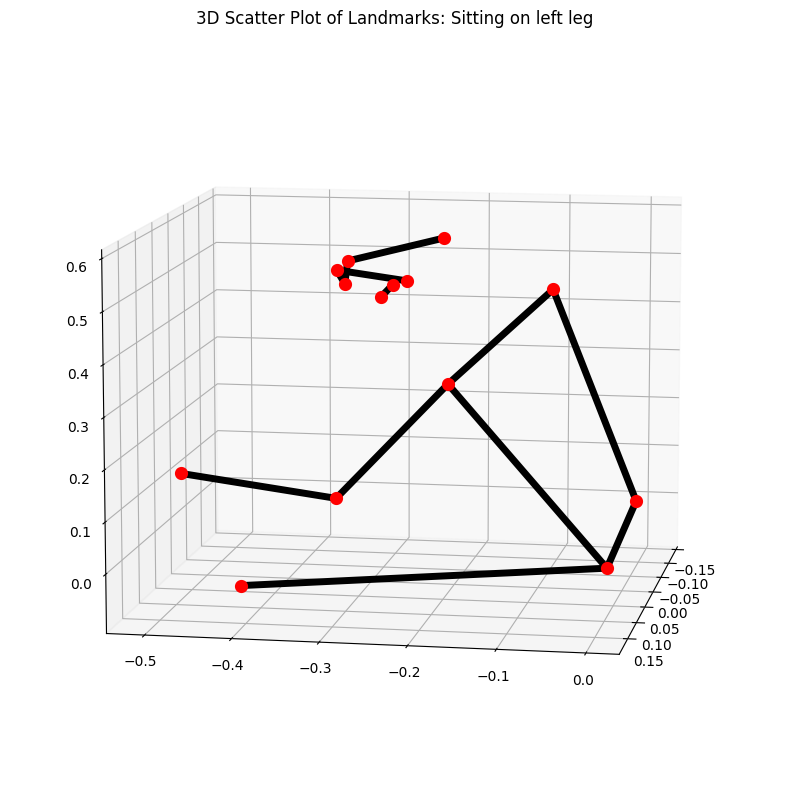

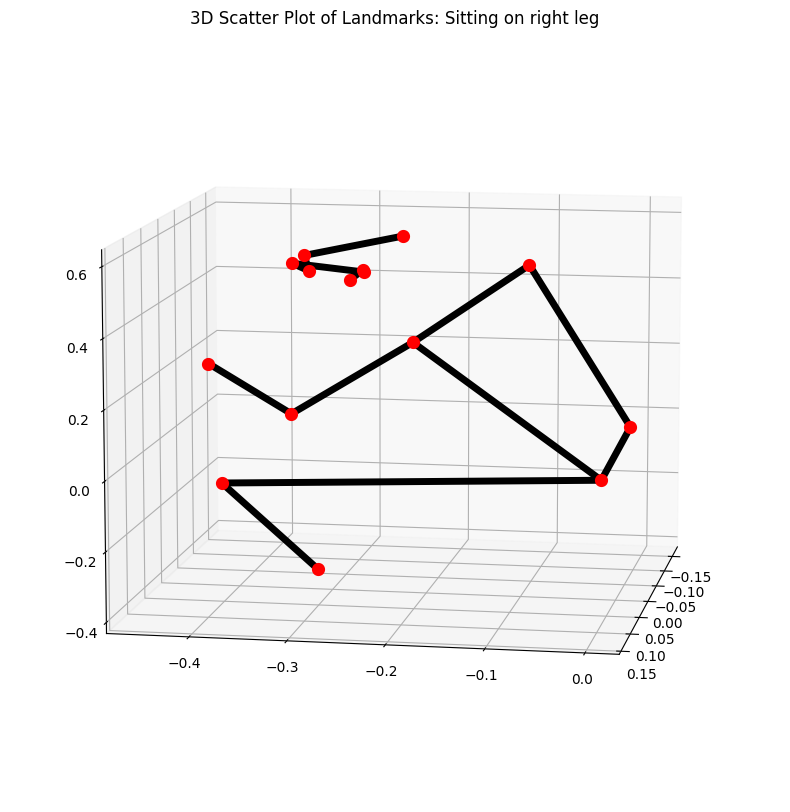

In [25]:
file_path = 'Research_Project/bad_postures_csv/2024-04-01 16-25-44-2.csv'
for i, row in enumerate(rows[:len(posture_labels)]):
    plot_landmarks_from_csv(file_path, row, posture_labels[i], 'side')